<a href="https://colab.research.google.com/github/seph0916/seph-solo-machine/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A07%EB%8B%A8%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공 신경망 ANN

In [1]:
# 패션 MNIST 데이터셋 사용 : 10종류의 패션아이템 불러오기
from tensorflow import keras
(train_input,train_target),(test_input,test_target)= \
keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# 데이터의 크기 확인
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


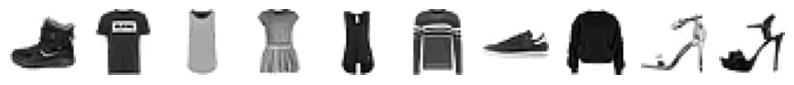

In [3]:
# 6장에서 배운것처럼 훈련데이터의 샘플을 그림으로 출력
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,10,figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i],cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [4]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [5]:
# 10개의 타깃에 대한 샘플 갯수 np.unique 함수 사용
import numpy as np
print(np.unique(train_target,return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [6]:
# 60000개의 샘플을 다 사용하는것 보다 샘플을 하나씩 꺼내 훈련해보는게 좋아보임. SGDClassifier 사용
# 패션 MNIST의 경우 0~255 사이의 정숫값 가짐. 따라서 255로 나누어 0~1사이의 값으로 정규화.
# 양숫값으로 이루어진 이미지를 전처리할때 널리 사용하기위해.
train_scaled=train_input/255.0
train_scaled=train_scaled.reshape(-1,28*28)

In [7]:
print(train_scaled.shape)

(60000, 784)


In [8]:
# SGDClassifier 과 cross_validate 함수 사용.
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc=SGDClassifier(loss='log',max_iter=5,random_state=42)
scores=cross_validate(sc,train_scaled,train_target,n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


In [9]:
# 인공 신경망 관련 이야기..
# 티셔츠, 바지 와 같은(z1,z2,''',z10) 출력값을 의미하는 바로 최종 값을 만드는 층 -> 출력층
# z1,z2,''',z10 과 같이 z 값을 계산하는 단위 -> 뉴런 또는 유닛
# 픽셀1, 픽셀2를 x1 ,x2 라하여 이러한 층 -> 입력층

In [10]:
# 코랩에서의 텐서플로우 임포트
# keras -> 고수준 API
# GPU를 사용하면 텐서플로우로 만든 딥러닝 모델을 빠르게 훈련 시킬수있다.
import tensorflow as tf
from tensorflow import keras

In [11]:
# 인공 신경망으로 모델 만들기.
# 인공 신경망에서 교차 검증을 잘 사용하지 않고 검증세트를 별도로 사용함.
# 그이유 -> 딥러닝 분야의 데이터셋 충분히 크고, 검증점수 안정적이며 교차 검증을 수행하기에는 훈련 시간이 너무 오래걸림.

In [12]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target,val_target=train_test_split(train_scaled,
                                                                   train_target,test_size=0.2,random_state=42)


In [13]:
print(train_scaled.shape,train_target.shape)

(48000, 784) (48000,)


In [14]:
print(train_scaled.shape,train_target.shape)

(48000, 784) (48000,)


In [15]:
# 레이어 패키지 안에 있는 다양한 층중 가장 기본인 밀집층 -> 많은 갯수의 픽셀과 출력층의 연결선이 매우 빽빽해서 밀집층
# 이런 층을 양쪽 뉴런이 모두 연결하기 있으므로 완전 연결층이라고 부르기도 함.
# Dense 클래스를 이용해 밀집층 만들기.
dense=keras.layers.Dense(10,activation='softmax',input_shape=(784,))

In [16]:
# 밀집층을 가진 신경망 모델 만들기.
model=keras.Sequential(dense)

In [17]:
# 인공 신경망으로 패션 아이템 분류하기
# keras 모델을 만드는 방식이 사이킷런과 다름.
# loss ->손실함수는 두가지가 있다. 이진 분류 binary_crossentropy
# 다중 분류 categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')

In [18]:
# 타깃값을 해당클라스만 1이고 나머지를 다 0으로 만드는 것을 원-핫 인코딩이라고 함.
# 따라서 다중 분류에서 크로스 엔트로피 손실함수를 사용하려면 0,1,2와같은 정수로된 타깃을 원-핫 인코딩으로 변환해야함.
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [19]:
# 정수로된 타깃값을 원-핫 인코딩으로 바꾸지 않고 사용할수 있다. 그게 바로 sparse_categorical_crossentropy.
# complie 메소드의 두번째 매개변수 metrics -> 케라스는 모델이 훈련할때 기본적으로 에포크마다 손실값을 출력함 그때
# 손실값이 줄어드는것을 보면 훈련이 잘되었다는 알수 있지만 정확도도 함께 출력 시키기 위해 씀.
model.fit(train_scaled,train_target,epochs=50)

Epoch 1/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6068 - accuracy: 0.7944
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4738 - accuracy: 0.8401
Epoch 3/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4502 - accuracy: 0.8478
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4378 - accuracy: 0.8522
Epoch 5/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4277 - accuracy: 0.8548
Epoch 6/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4223 - accuracy: 0.8565
Epoch 7/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4178 - accuracy: 0.8578
Epoch 8/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4149 - accuracy: 0.8592
Epoch 9/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4118 - accuracy: 0.8605
Epoch 10/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.410

In [20]:
# 모델을 훈련 시킨 이후 모델의 성능을 평가하는 evluate method
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4689 - accuracy: 0.8493


[0.46888086199760437, 0.8492500185966492]

# 심층 신경망 DNN

In [21]:
# 인공 신경망의 성능을 더 높여보자.
from tensorflow import keras
(train_input,train_target),(test_input,test_target)=\
keras.datasets.fashion_mnist.load_data()

In [22]:
# 픽셀값의 범위 0~255를 0~1사이로 변환하고, 28*28 크기의 2차원 배열을 784 크기 1차원 배열로 .
# 이후 훈련세트와 검증세트로 나누기.
from sklearn.model_selection import train_test_split
train_scaled=train_input/255.0
train_scaled=train_scaled.reshape(-1,28*28)
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [23]:
# 인공 신경망 모델 층 2개 추가.
# 입력층과 출력층 사이 밀집층 추가 -> 입력층과 출력층 사이에 있는 층을 은닉층이라고 함.
# 은닉층에 활성화함수를 적용하는 이유 : 첫번째 식에서 계산된 b가 두번째 식에서 c를 계산하기 위해서 쓰임.
# 하지만 첫번째 식의 a를가지고 b를통해 c 표현 가능.
# 신경망도 이와 같다. 은닉층에서 선형적인 산술 계산만 수행한다면 역활이 없는셈이다.
# 선형 계산을 적당하게 비선형적으로 비틀어 주어야함.

In [24]:
# 시그모이드 활성화 함수를 사용한 은닉층과 소프트맥스 함수를 사용한 출력층을 케라스 decse클래스로 만들어보기.
dense1=keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
dense2=keras.layers.Dense(10,activation='softmax')

In [25]:
# dense1 , dense2 객체를 sequential 클래스에 추가해 심층 신경망을 만들어 보기
# 이게 인공신경망의 강력 성능 -> 층을 추가해 입력데이터에 대해 연속적인 학습을 함.
model=keras.Sequential([dense1,dense2])

In [26]:
# 첫줄: 모델 이름
# 그다음줄 부터 : 층의 이름 , 클래스 , 출력크기, 모델 파라미터 개수
# 784개의 입력층 뉴런에 100개의 은닉층 뉴런.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 층을 추가하는 다른방법.
# sequemtial 클래스의 생성자 안에 바로 dense 클래스의 객체를 만들기.
model=keras.Sequential([keras.layers.Dense(100,activation='sigmoid',input_shape=(784,),
                                           name='hidden'),
                        keras.layers.Dense(10,activation='softmax',name='output')],name='패션 MNIST모델')

In [28]:
model.summary()

Model: "패션 MNIST모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [29]:
# 많은 층을 사용할때에 세퀀셜  클래스 생성자가 길어지기 때문에
# add method 를 사용해 보자.
model=keras.Sequential()
model.add(keras.layers.Dense(100,activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10,activation='softmax'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5733 - accuracy: 0.8025
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4120 - accuracy: 0.8520
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3768 - accuracy: 0.8637
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3529 - accuracy: 0.8719
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3359 - accuracy: 0.8785


In [32]:
# 렐루 함수 max(0,x)
# 기존에 사용하던 시그모이드 함수의 단점 -> 함수의 오른쪽과 왼쪽 끝으로 갈수록 그래프가 누워있기때문에 올바른 출력을 만드는데 신속하게 대응하지 못함.
# Flatten 클래스 배치차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼침.
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [34]:
# reshape 함수를 사용하지 않음.
(train_input,train_target),(test_input,test_target)=\
keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42)

In [35]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5293 - accuracy: 0.8133
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3923 - accuracy: 0.8590
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3544 - accuracy: 0.8722
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3317 - accuracy: 0.8794
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3169 - accuracy: 0.8862


In [36]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3691 - accuracy: 0.8744


[0.3691313862800598, 0.8744166493415833]

In [37]:
# 옵티마이저
# keras는 기본적으로 미니 배치 경사 하강법을 사용하며 미니배치 개수는 32개임.
# fit method에 batch_size는 이를 조정할수있다.
# complie method에 기본 경사하강법 알고리즘인 RMSprop을 사용함.
# 'sgd' 와 sgd 차이 -> sgd라고 설저하는것은 클래스객체를 만들고 사용하는것이나, 'sgd'로 지정을 해주면 자동으로 클래스 객체 만들어줌
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [38]:
sgd=keras.optimizers.SGD()
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics='accuracy')

In [39]:
sgd=keras.optimizers.SGD(learning_rate=0.1)

In [40]:
# 네스테로프 모멘텀 최적화 -> 모멘텀 최적화를 2번 반복하여 구현 기본 확률적 경사 하강법 보다 나은 성능을 제공
# 모델이 최적점에 갈수록 학습률을 낮춤. -> 최적점 수렴할 가능성이 높다.
# 이런 학습률을 적응적 학습률 이라고함.
# adagrad, rmsprop 가 대표적 옵티마이저.
# RMSprop의 장점을 접목한 Adam 클래스로 패션 모델 훈련.
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [41]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
model.fit(train_scaled,train_target,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5260 - accuracy: 0.8164
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3968 - accuracy: 0.8576
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3517 - accuracy: 0.8728
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3261 - accuracy: 0.8819
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3082 - accuracy: 0.8861


In [42]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3419 - accuracy: 0.8745


[0.34185120463371277, 0.8744999766349792]

# 신경망 모델 훈련

In [1]:
# 손실곡선
# fit() method -> history 클래스 객체를 반환함.
# 훈련 과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어있다. 이 값을 이용해 그래프를 그려보자.
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target),(test_input,test_target)=\
keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,
                                                                 train_target, test_size=0.2,random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# 모델을 만드는 간단한 함수 .
def model_fn(a_layer=None):
  model=keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100,activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [3]:
model=model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
# verbose =0 -> 에포크 마다 함께 손실 등의 훈련과정을 나타내지 않음 , 기본값은 1 이고, 2는 진행막대 뺴고 출력
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=5,verbose=2)

Epoch 1/5
1500/1500 - 5s - loss: 0.5366 - accuracy: 0.8115 - 5s/epoch - 3ms/step
Epoch 2/5
1500/1500 - 4s - loss: 0.3944 - accuracy: 0.8584 - 4s/epoch - 3ms/step
Epoch 3/5
1500/1500 - 4s - loss: 0.3556 - accuracy: 0.8715 - 4s/epoch - 2ms/step
Epoch 4/5
1500/1500 - 4s - loss: 0.3329 - accuracy: 0.8793 - 4s/epoch - 3ms/step
Epoch 5/5
1500/1500 - 2s - loss: 0.3171 - accuracy: 0.8870 - 2s/epoch - 2ms/step


In [5]:
#  history 객체 -> 훈련 측정값이 담겨있는 딕셔너리 들어있음 , loss , accuracy
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


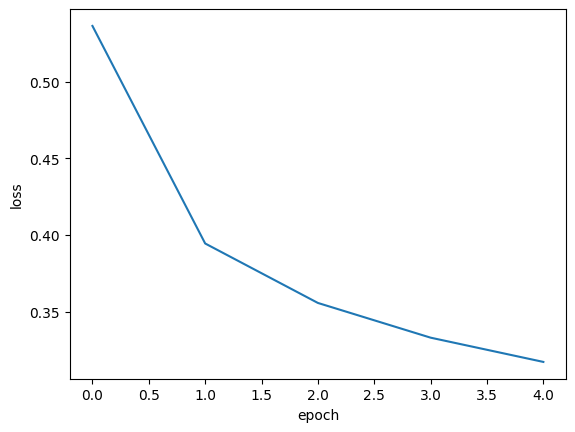

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

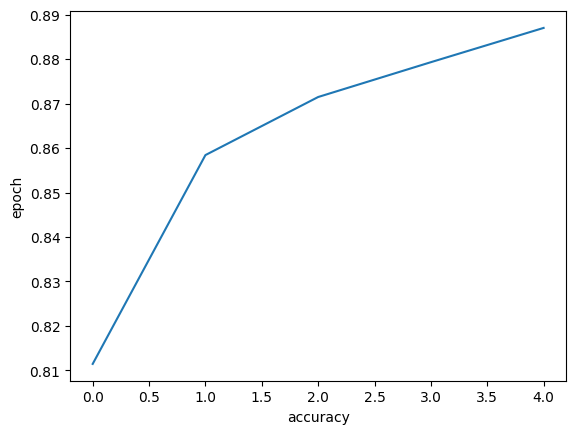

In [7]:
# epoch 가 증가할때마다 손실이 감소하고 정확도 증가함
plt.plot(history.history['accuracy'])
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.show()

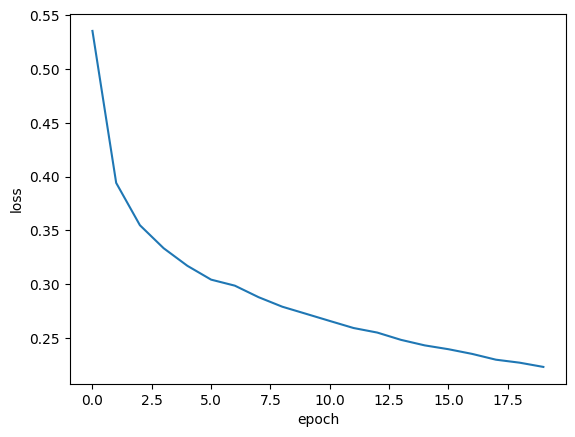

In [8]:
# epoch를 20회로 늘려보자.
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
# 검증 손실.
# 에포크에 따른 과대 과소적합을 파악하기 위해서 훈련데이터와 검증데이터에 대한 점수가 필요.
# 손실을 사용한 과대/과소 적합 다루기
# 검증손실 계산을 위한 케라스 모델 fit() method 에 검증데이터 전달 가능. -> validation_data 매개변수에 검증에 사용할 입력 타깃 튜플로 만들어 전달하기.
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,
                  validation_data=(val_scaled,val_target))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


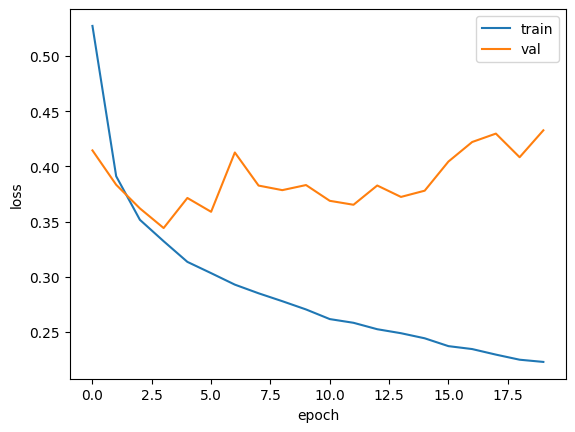

In [10]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [11]:
# drop out(드롭아웃): 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막음.
# 왜 과대 적합을 막는지? : 이전 층으 ㅣ일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고 모든 압력에 대해 주의를 기울여야 합니다.
# drop out 층을 추가해보기.
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


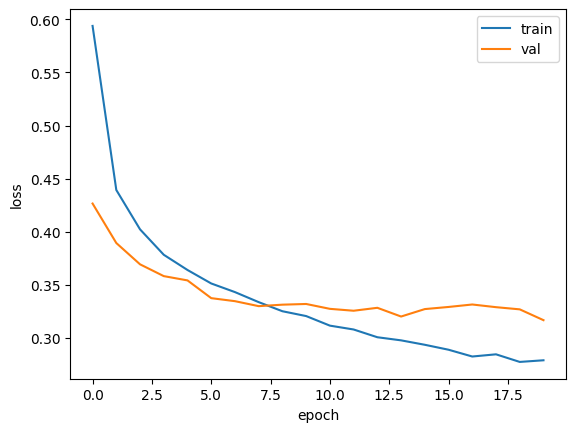

In [17]:
# drop out 을 사용했었을때의 훈련손실과 검증손실의 그래프를 그려보기.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data=(val_scaled,val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [19]:
# epoch를 20번 훈련했기 때문에 다소 과대적합 되어있으므로 횟수를 10으로 줄여서 ㄱ
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=10, verbose=0,
                  validation_data=(val_scaled,val_target))

In [23]:
# 모델 구조와 모델 파라미터를 함께 저장하는 save method.
model.save_weights('model-weights.h5')

In [24]:
model.save('model-whole.h5')

In [25]:
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Aug  6 05:17 model-weights.h5
-rw-r--r-- 1 root root 981176 Aug  6 05:17 model-whole.h5


In [27]:
# 훈련을 하지않은 새로운 모델과 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용해보기.
# 두번째 model-whole.h5 파일에서 새로운 모델 만들어 사용해보기.
# 첫번째경우
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [28]:
# keras에서 predict method 샘플마다 10개의 클래스에 대한 확률 반환.
import numpy as np
val_labels=np.argmax(model.predict(val_scaled),axis=-1)
print(np.mean(val_labels==val_target))

375/375 [==============================] - 2s 5ms/step
0.8750833333333333


In [29]:
model=keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8751


[0.34530699253082275, 0.875083327293396]

In [33]:
# 모델을 훈련하여 검증점수 상승 지점을 확인하고, 과대적합되지 않는 반복수만큼 훈련했는데 두번이 아닌 한번으로 해결할수 없을까?
# 콜백 -> 훈련 과정 중간에 작업을 수행할수 있게 하는 객체.
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb])

In [35]:
model=keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3243 - accuracy: 0.8842


[0.32430562376976013, 0.8841666579246521]

In [36]:
# 조기 종료 -> 에포크 횟수를 제한하는 역할이지만 모델 과적합을 막아줌.
# EarlyStopping call back-> patience 변수: 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정. ex)2로 지정하면 2번연석 검증점수 향상되지 않으면 중지.
# restore_best_weights = True : 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림.
# 얼리스타핑 + 모델 체크포인트 사용시 가장 낮은 검증손실의 모델을 파일에 젖아하고 손실이 다시상승할때 훈련을 중지 할수 있음.
model=model_fn(keras.layers.Dropout(0,3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,verbose=0,validation_data=(val_scaled,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

In [37]:
print(early_stopping_cb.stopped_epoch)

7


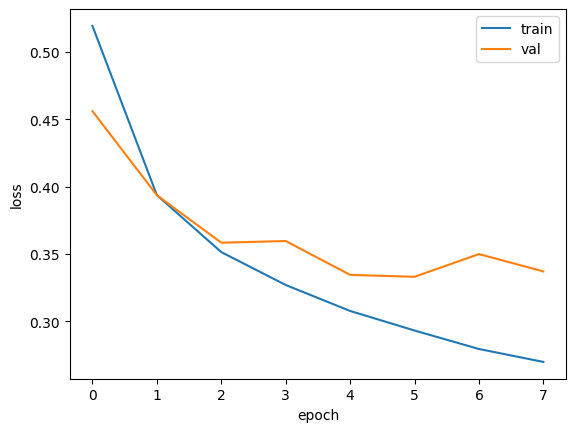

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [39]:
# 조기 종료로 얻은 모델을 사용해 검증세트에 대한 성능 확인
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3331 - accuracy: 0.8806


[0.3330782949924469, 0.8805833458900452]